In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('Resume.csv')

In [43]:
print(df.head())

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [44]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [45]:
df.shape

(2484, 4)

In [46]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

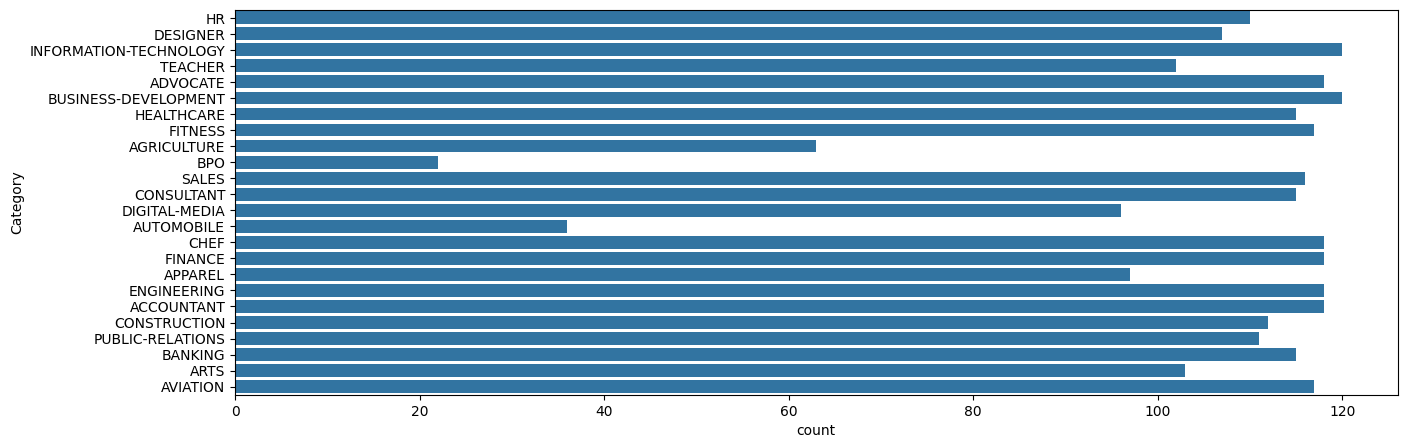

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
#plt.xticks(rotation=90)
plt.show()

In [48]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()

In [49]:
labels

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x22ae8c287f0>,
 [Text(1.0873558992701133, 0.16630438455579932, 'HR'),
  Text(0.9879404831198965, 0.4837081783604921, 'DESIGNER'),
  Text(0.8001110191456365, 0.7548657874362377, 'INFORMATION-TECHNOLOGY'),
  Text(0.5427553363733082, 0.9567740824449089, 'TEACHER'),
  Text(0.23740442402519826, 1.0740759467808894, 'ADVOCATE'),
  Text(-0.08893988823958886, 1.0963985116188044, 'BUSINESS-DEVELOPMENT'),
  Text(-0.40741934857491047, 1.021767818247764, 'HEALTHCARE'),
  Text(-0.6887870307285084, 0.857655190796514, 'FITNESS'),
  Text(-0.9089745936593924, 0.6194878433688129, 'AGRICULTURE'),
  Text(-1.0497142719294128, 0.32878556432377504, 'BPO'),
  Text(-1.0999287409107072, 0.01252057980233263, 'SALES'),
  Text(-1.057311143743458, -0.3034685244237055, 'CONSULTANT'),
  Text(-0.9258572387937805, -0.5939599088938216, 'DIGITAL-MEDIA'),
  Text(-0.7197731711526006, -0.8318212440716631, 'AUTOMOBILE'),
  Text(-0.45983075785550176, -0.9992775761168842, 'CHEF'),
  Text(-0.16630

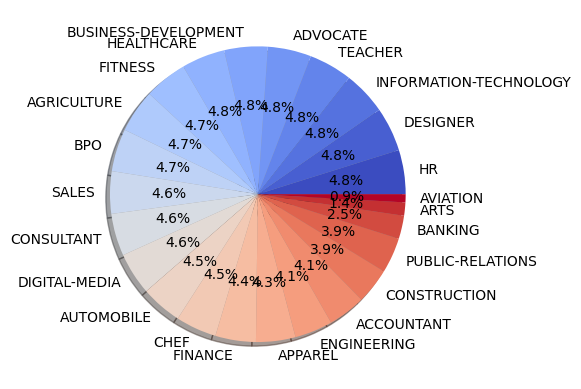

In [50]:
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.coolwarm(np.linspace(0, 1, len(labels))))

In [51]:
df['Category'][0]

'HR'

In [52]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [53]:
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [54]:
import re

#remove URLS, hashtags, mentions, special characters and punctuations 
def cleanResume(txt):
    cleanTxt=re.sub('http\S+\s', ' ', txt)
    cleanTxt=re.sub('RT|cc\b', '', cleanTxt)
    cleanTxt=re.sub('@\S+', '', cleanTxt)
    cleanTxt=re.sub('#\S+', '', cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt) #remove non-ascii characters
    cleanTxt= re.sub('\s+', ' ', cleanTxt)

    return cleanTxt

In [55]:
cleanResume("my ### #garshvora website is like https://garshvora.com and access it @gmail.com")

'my website is like and access it '

apply function to create clean resume text

In [56]:
df['Resume']=df['Resume_str'].apply(lambda x: cleanResume(x))

In [57]:
df['Resume'][0]

' HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMINISTRATOR Summary Dedicated Customer Service Manager with 15 years of experience in Hospitality and Customer Service Management Respected builder and leader of customer focused teams strives to instill a shared enthusiastic commitment to customer service Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi tasker Client relations specialist Accomplishments Missouri DOT Supervisor Training Certification Certified by IHG in Customer Loyalty and Marketing by Segment Hilton Worldwide General Manager Training Certification Accomplished Trainer for cross server hospitality systems such as Hilton OnQ Micros Opera PMS Fidelio OPERA Reservation System ORS Holidex Completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment Experience HR Administrator Marketi

categorical encoding of output variable

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
le.fit(df['Category'])
df['Category_Encoded']=le.transform(df['Category'])

In [60]:
df['Category_Encoded'].value_counts()

Category_Encoded
20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: count, dtype: int64

Vectorization using TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_text=tfidf.transform(df['Resume'])

In [65]:
required_text

<2484x40033 sparse matrix of type '<class 'numpy.float64'>'
	with 805217 stored elements in Compressed Sparse Row format>

In [66]:
required_text.shape

(2484, 40033)

Train the model

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(required_text, df['Category_Encoded'], test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1664, 40033)
(820, 40033)


Use K Nearest Neighbour Classifier for multiclass classification

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [74]:
y_pred=clf.predict(X_test)

In [75]:
print(y_pred)

[23 14 11 10  9  9 13 18 23 13 15 18 22  8  1 18 23  1  3 16  3 19 13  9
 14  9  3  9 12 19  5 18  0  9 23 12 18 10 15 17 22 20 13 20 19  0 23 11
 10  9  6 12 10 18  1  9  9  1  3 21  9 10 12 20 18  9 18 23 18 11 15 22
 21 22  6  6 20 16 22 20 23  0 10  6  9  6 18 23 21 11 15  0 12 19 22 18
  0 23  0  0  7  3 23 14 12  1 14 18  5  5 15 23 18 18 16 16 21 11 14 11
 14  7 18 20 18 15  0 21  1  9 18  1  2 11  1 18 22 14 22  9  1 18 11  9
 20 21 13 23 15 19  9  9 18  9  9  6 20 21 11 23 21 22 11 20 12 22  1 22
 22  3  0 18 14  1  1 21  6 22 19 15  1 22 22 20  4 12 13 20  1 15  1  1
 13 10  9 17 22 12 18 15 18  9  6 15  3  0 20 20 16 15 22 23 15  0 18 16
  0  6 11 22 10  1 21 18 10 20  9 19  6  0 14 13 20 15 16  0 22  7 23  3
 15  9  9  0  1 22 20 13 20 16 21  9  9  9  6 14 13 13 18  3  7 11 14 21
 20  7 21 22 11  7 23  1 21  1  3 16 23 10  1 23  2 20 21  8 13 21 13 15
 14 18 10  9 21  0 22  9 13 20 14 11 23 18 21  9 20  9 11 19 22 21 23 19
 12 12 15  9 19  9 22 17 22 23 16 22 20 13 11 18 10

Get accuracy of the model prediction

In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.4926829268292683


Build a prediction system for serving the model

In [77]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

test pickle load

In [80]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

get mappings from label encoder

In [86]:
le_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_mapping)

{0: 'ACCOUNTANT', 1: 'ADVOCATE', 2: 'AGRICULTURE', 3: 'APPAREL', 4: 'ARTS', 5: 'AUTOMOBILE', 6: 'AVIATION', 7: 'BANKING', 8: 'BPO', 9: 'BUSINESS-DEVELOPMENT', 10: 'CHEF', 11: 'CONSTRUCTION', 12: 'CONSULTANT', 13: 'DESIGNER', 14: 'DIGITAL-MEDIA', 15: 'ENGINEERING', 16: 'FINANCE', 17: 'FITNESS', 18: 'HEALTHCARE', 19: 'HR', 20: 'INFORMATION-TECHNOLOGY', 21: 'PUBLIC-RELATIONS', 22: 'SALES', 23: 'TEACHER'}


In [88]:
import pickle

clf=pickle.load(open('clf.pkl', 'rb'))
cleaned_resume=cleanResume(myresume)

input_features=tfidf.transform([cleaned_resume])
prediction=clf.predict(input_features)[0]

print(prediction)
category_name = le_mapping.get(prediction, "Unknown")
print(category_name)


15
ENGINEERING


In [90]:
with open('job_mappings.pkl', 'wb') as f:
    pickle.dump(le_mapping, f)